# Identification of nonlinear systems


## Nonlinear estimation problem

Given a set of training data $\{(x_i, y_i)\}_{i\in I}$ with $x_i\in X$ and $y_i\in \mathbb{R}$, we seek to determine a function $g:X\to \mathbb{R}$ to "best" interpolate these data according to the model 

$$
y = g(x).
$$

We will focus on functions in certain functional spaces. We shall, in particular, restrict our attention to a Hibert space $H$.

Our objective is to solve the following regularized least-squares problem over $H$ with a regularizer $R:H\to\mathbb{R}$ and regularization parameter $\gamma>0$

$$
\operatorname*{Minimize}_{g\in H} \sum_{i\in I} (y_i - g(x_i))^2 + \gamma R(g)
$$

A solution (minimizer) of this problem (when there exists one) is denoted by $g^\star$.

Good news: although this problem looks too abstract (the minimization is carried out over an abstract space $H$), it is possible to derive a closed-form solution for $g$ provided we endow $H$ with a certain structure. This is the structure of a reproducing kernel Hilbert space.

## Reproducing kernel Hilbert spaces

#### RKHS definition

A [reproducing kernel Hilbert space](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space) (RKHS) is a Hilbert space $H$ of real-valued function over a nonempty set $X$ in which pointwise evaluation, defined as
$$
L_x(f) = f(x),\ (\forall f\in H),
$$
is a continuous mapping.

RHKS are fully characterised by a *positive semidefinite kernel* which is a symmetric mapping $K:X\times X\to\mathbb{R}$ such that
$$
\sum_{i,j=1}^{n}c_i c_j X(x_i, x_j) \geq 0,
$$
for all $p\in\mathbb{N}$, $c_1,\ldots, c_n\in\mathbb{R}$.

#### Moore-Aronszajn Theorem

According to the [Moore-Aronszajn Theorem](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space#Moore%E2%80%93Aronszajn_theorem), RHKS are characterised by a positive semidefinite kernel and, conversely, positive semidefinite kernels induce RKHS.

To every RKHS $H$ corresponds a *unique* positive semidefinite kernel $K$ called the **reproducing kernel** which is such that
$$
g(x) = \langle g, K_x \rangle,\ (\forall x \in X)(\forall g \in H)
$$
Conversely, to a positive semidefinite kernel $K$ corresponds a unique induced RKHS whose reproducing kernel is $K$.

#### The norm of an RKHS

Let $K$ be a kernel and $H$ the corresponding RKHS. 

The following functions are in $H$:

$$
g(x) = \sum_{i=1}^{p} a_i K(x_i, x),
$$

for some $a_i$ and $x_i$, $i=1,\ldots,p$.

The norm of $g$ is 

$$
\|g\|_{H} = \sum_{i,j=1}^{p} a_i a_j K(x_i, x_j).
$$


#### The Gram matrix

Last step before we state a result of central importance in system identification, functional analysis and learning theory at large.

Let $Y = (y_i)_{i}\in\mathbb{R}^N$ be the obtained measurements and $x_i$ be the corresponding state vectors (typically past values of $y$ and $u$). 

The **Gram matrix** or **kernel matrix** is the matrix $K\in\mathbb{R}^{N\times N}$ defined as 
$$
K = (K(x_i, x_j))_{i,j} 
$$

#### Representer theorem

Consider the identification problem:


$$
\mathbb{P}: \operatorname*{Minimize}_{g\in H} \sum_{i\in I} (y_i - g(x_i))^2 + \gamma \|g\|_H,
$$


where $\|{}\cdot{}\|_H$ is the norm of a RKHS $H$.

According to the [represented theorem](https://en.wikipedia.org/wiki/Representer_theorem), this problem has an **explicit solution** which is 

$$
g^\star(x) {}={} \sum_{i=1}^{N} c_i^\star K(x_i, x)
$$

with $c^\star = (c_i^\star)_i$ given by

$$
c^\star = (K + \gamma I_N)^{-1}Y,
$$


where $I_N$ is the $N\times N$ identity matrix.

## Kernels

Let us have a look at a few examples of kerners:

#### Linear kernel

Let $P\in\mathbb{R}^{n\times n}$ be a symmetric positive semidefinite matrix and define

$$
K(x_1, x_2) = x_1'Px_2.
$$

According to the Moore-Aronszajn Theorem, the RHKS which is induced by this kernel is that of linear functions 

$$
g(x) = K_{c}(x) = c'Px.
$$

If $P$ is full rank, then the RKHS is the space of all function $g(x) = \theta' x$ with $\theta\in\mathbb{R}^n$ and the norm on that space is 

$$
\|g\|_H = \theta' P^{-1} \theta.
$$


#### Gaussian kernel

The [Gaussian kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) is the parametric kernel

$$
K(x_1, x_2) = \exp \left( -\rho \|x_1 - x_2\|^2 \right),
$$

with $\rho>0$.

#### Exponential kernel

The exponential kernel is very similar to the Gaussian kernel

$$
K(x_1, x_2) = \exp \left( -\rho \|x_1 - x_2\| \right),
$$

with $\rho>0$. 

The only difference is that there is the norm $\|{}\cdot{}\|$ in lieu of the squared norm.

#### Sigmoid kernel

The sigmoid kernel is also known as the multilayer perceptron kernel. It is very popular in machine learning and, in particular, in SVM. It is defined as

$$
K(x_1, x_2) = \tanh (a x_1' x_2 + b).
$$

In [1]:
# Necessary imports
import numpy as np
import scipy as sp
import cvxpy as cp
import matplotlib.pyplot as plt

Let us give a simple nonlinear regression example.

Given a collection of data $\{(x_i, y_i)\}_{i=1}^{N}$ with $x_i\in\mathbb{R}^n$ and $y_i\in\mathbb{R}$, we aim at determining a function $g$ which solves $\mathbb{P}$.

In [2]:
# KERNELS

class kernel:
    
    def __init__(self):
        pass
    
    def call(self, x, y):
        pass

    
class gaussian_kernel(kernel):
    
    def __init__(self, rho):
        super().__init__()
        self._rho = rho
        
    def call(self, x, y):
        r = np.exp( -self._rho* np.linalg.norm(x-y)**2 )
        return r
    
class exponential_kernel(kernel):
    
    def __init__(self, rho):
        super().__init__()
        self._rho = rho
        
    def call(self, x, y):
        r = np.exp( -self._rho* np.linalg.norm(x-y) )
        return r

class sigmoid_kernel(kernel):
    
    def __init__(self, a, b):
        super().__init__()
        self._a = a
        self._b = b
        
    def call(self, x, y):
        r = np.tanh(self._a * np.dot(x,y) + self._b)
        return r    
    
# Example of use of a kernel:
sig_kernel = sigmoid_kernel(0.5,0.1)   
kxy = sig_kernel.call(np.array([1,2]),np.array([4,3]))

In [75]:
class rkhs_function:
    
    def __init__(self, X, c, krnl):
        if not isinstance(krnl, kernel):
            raise TypeError
        self._X = X
        shape_X = np.shape(X)
        self._num_data = shape_X[0]
        self._dim_data = shape_X[1]
        self._krnl = krnl
        self._c = c
        pass
    
    
    def call(self,x):
        gx = 0.
        for i in range(0, self._num_data):
            gx += self._c[i] * self._krnl.call(self._X[i], x)
        return gx
            

# Example of use    
X = np.array([[1,2,5],[3,4,-1]])                 # data (centers of kernel functions)
c = np.array([0.1, 0.2])                         # coefficients
gauss_krnl = gaussian_kernel(0.5)                # choose a kernel
g_function = rkhs_function(X, c, gauss_krnl)     # create a function in the RHKS
gx = g_function.call(np.array([1,1.9,4]))        # use the function

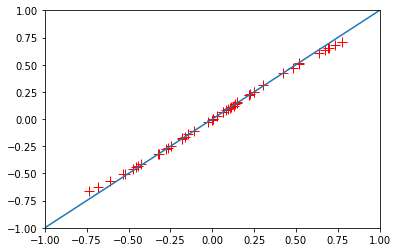

In [113]:
# Construct some training data
n_training_data = 50
dim_x_data = 2

x_training_data  = np.zeros([n_training_data, dim_x_data])
y_training_data  = np.zeros([n_training_data, 1])

for i in range(0, n_training_data):
    x_training_data[i,0] = np.sin(0.2*i**1.3 + 1.)
    x_training_data[i,1] = np.sin(0.4*(i**1.2) + .5)
    y_training_data[i] = np.sin(0.4*x_training_data[i,0]) + np.sin(0.4*x_training_data[i,1])

# Choose a kernel
rho_gaussian = 0.1
krnl = gaussian_kernel(rho_gaussian)

# Construct the Gram matrix
gram_matrix = np.zeros([n_training_data, n_training_data])    
for i in range(0, n_training_data):
    for j in range(0, n_training_data):
        gram_matrix[i,j] = krnl.call(x_training_data[i], x_training_data[j])

# Solve the least squares problem using the representer theorem        
gamma = 0.2   
c_star = np.linalg.solve(                                                      \
                     gamma * np.identity(n_training_data)                      \
                      + gram_matrix, y_training_data)

# The estimated function is
g_star = rkhs_function(x_training_data, c_star, krnl)

# Validate against the training dataset
y_training_data_predicted  = np.zeros([n_training_data, 1])

for i in range(0, n_training_data):
    y_training_data_predicted[i] = g_star.call(x_training_data[i])
    
plt.plot( y_training_data, y_training_data_predicted, marker='+', color='r', markersize=10, linestyle='None')
plt.plot( np.array([-1,1]), np.array([-1,1]) )
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.show()